In [1]:
import os, os.path
import sys
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Softmax, Input, Flatten
from keras.optimizers import Adam, RMSprop, SGD
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import BatchNormalization

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Папка с уменьшиными изоюражениями
base_dir = 'C:/Users/azovm/PycharmProjects/lesson3/chest_xray'

# Директории для выборок для обучения
train_dir = os.path.join(base_dir, 'train')
# Директории для выборок для проверки
validation_dir = os.path.join(base_dir, 'valid')
# Директории для выборок для теста
test_dir = os.path.join(base_dir, 'test')

# размер выборки
BATCH_SIZE = 5
IMG_WIDTH = 150
IMG_HEIGHT = 150
model_filename = 'model.h5';

Using TensorFlow backend.


In [2]:
# Convolution
model = Sequential()
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(1048, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1048, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

optimizer = Adam(lr=0.00001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 512)     14336     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 512)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 512)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 512)       2359808   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 512)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 1024)      4719616   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 1024)     

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=4,
    width_shift_range=0.04,
    height_shift_range=0.04,
    zoom_range=[0.8, 1.0],
    shear_range=0.04,
    brightness_range=[0.3, 1.0]
)
training_set = train_datagen.flow_from_directory(train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

val_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

validation_set = val_datagen.flow_from_directory(train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)



Found 5840 images belonging to 2 classes.
Found 1168 images belonging to 2 classes.


In [4]:
EPOCHS = 20

history = model.fit_generator(
    training_set,
    steps_per_epoch=training_set.samples,
    epochs=EPOCHS,
    verbose=1,
    validation_data=validation_set,
    validation_steps=validation_set.samples,
    shuffle=True,
)

Epoch 1/20
5840/5840 [==============================] - 1107s 190ms/step - loss: 0.2537 - accuracy: 0.8977 - val_loss: 0.0025 - val_accuracy: 0.9306
Epoch 2/20
5840/5840 [==============================] - 1077s 184ms/step - loss: 0.1634 - accuracy: 0.9397 - val_loss: 0.0693 - val_accuracy: 0.8818
Epoch 3/20
5840/5840 [==============================] - ETA: 17:34 - loss: 0.1484 - accuracy: 0.9484 - ETA: 16:53 - loss: 0.1390 - accuracy: 0.9510
Epoch 4/20
5840/5840 [==============================] - 1059s 181ms/step - loss: 0.1110 - accuracy: 0.9597 - val_loss: 6.0237e-04 - val_accuracy: 0.9118
Epoch 5/20
5840/5840 [==============================] - 1053s 180ms/step - loss: 0.1000 - accuracy: 0.9631 - val_loss: 0.0555 - val_accuracy: 0.9460
Epoch 6/20
5840/5840 [==============================] - 1055s 181ms/step - loss: 0.0902 - accuracy: 0.9665 - val_loss: 6.4611e-06 - val_accuracy: 0.9772
Epoch 7/20
5840/5840 [==============================] - 1056s 181ms/step - loss: 0.0820 - accuracy:

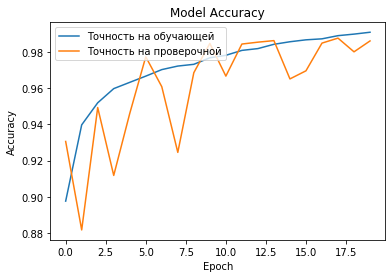

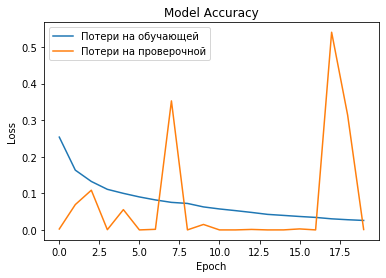

In [6]:
model.save("lesson3.h5")
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Точность на обучающей', 'Точность на проверочной'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Потери на обучающей', 'Потери на проверочной'], loc='upper left')
plt.show()

